## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
from keras.regularizers import l1, l2, l1_l2
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlpl1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), kernel_regularizer=l1(l1_ratio))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


def build_mlpl1l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), kernel_regularizer=l1_l2(l1_ratio,l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), kernel_regularizer=l1_l2(l1_ratio,l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
for regul in ['L1','L1L2']:
    for regulizer_ratio in EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer %s rate=%.6f" % (regul,regulizer_ratio))
        if regul=='L1':
            model = build_mlpl1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
        elif regul=='L1L2':
            model = build_mlpl1l2(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio,l2_ratio=regulizer_ratio)
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-%s-%s" % (regul,str(regulizer_ratio))
        results[exp_name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}




Experiment with Regulizer L1 rate=0.010000




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





50000/50000 [==============================] - 12s 240us/step - loss: 198.6355 - acc: 0.2271 - val_loss: 41.0943 - val_acc: 0.2315
Epoch 2/50
50000/50000 [==============================] - 11s 221us/step - loss: 19.1068 - acc: 0.1127 - val_loss: 7.2867 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 11s 227us/step - loss: 4.1140 - acc: 0.0997 - val_loss: 2.6523 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.4866 - acc: 0.0989 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 11s 226us/step - loss: 2.4626 - acc: 0.09

50000/50000 [==============================] - 8s 168us/step - loss: 2.4626 - acc: 0.0986 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 9s 179us/step - loss: 2.4626 - acc: 0.0968 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.4626 - acc: 0.0993 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.4626 - acc: 0.0977 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.4626 - acc: 0.0974 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 9s 177us/step - loss: 2.4626 - acc: 0.0975 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.4626 - acc: 0.0975 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============

50000/50000 [==============================] - 9s 180us/step - loss: 2.9517 - acc: 0.6132 - val_loss: 3.3589 - val_acc: 0.4779
Epoch 43/50
50000/50000 [==============================] - 9s 172us/step - loss: 2.9131 - acc: 0.6158 - val_loss: 3.1878 - val_acc: 0.5116
Epoch 44/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.8683 - acc: 0.6189 - val_loss: 3.1977 - val_acc: 0.4968
Epoch 45/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.8268 - acc: 0.6197 - val_loss: 3.2125 - val_acc: 0.4891
Epoch 46/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.7843 - acc: 0.6212 - val_loss: 3.0128 - val_acc: 0.5347
Epoch 47/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.7450 - acc: 0.6239 - val_loss: 3.0347 - val_acc: 0.5193
Epoch 48/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.7074 - acc: 0.6274 - val_loss: 3.0271 - val_acc: 0.5162
Epoch 49/50
50000/50000 [===========

50000/50000 [==============================] - 9s 188us/step - loss: 0.8774 - acc: 0.6937 - val_loss: 1.4045 - val_acc: 0.5272
Experiment with Regulizer L1 rate=0.000000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 208us/step - loss: 2.0188 - acc: 0.2772 - val_loss: 1.8589 - val_acc: 0.3523
Epoch 2/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.8051 - acc: 0.3669 - val_loss: 1.7568 - val_acc: 0.3870
Epoch 3/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.7193 - acc: 0.3963 - val_loss: 1.6822 - val_acc: 0.4132
Epoch 4/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.6615 - acc: 0.4160 - val_loss: 1.6379 - val_acc: 0.4266
Epoch 5/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.6133 - acc: 0.4356 - val_loss: 1.6015 - val_acc: 0.4365
Epoch 6/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.5743 - 

50000/50000 [==============================] - 10s 192us/step - loss: 2.4623 - acc: 0.0990 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.4623 - acc: 0.0981 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.4623 - acc: 0.0982 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.4622 - acc: 0.0976 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.4622 - acc: 0.0985 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.4621 - acc: 0.0984 - val_loss: 2.4622 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 11s 213us/step - loss: 2.4621 - acc: 0.0973 - val_loss: 2.4621 - val_acc: 0.1000
Epoch 14/50
50000/50000 [=========

Epoch 15/50
50000/50000 [==============================] - 9s 188us/step - loss: 4.5661 - acc: 0.5137 - val_loss: 4.6326 - val_acc: 0.4773
Epoch 16/50
50000/50000 [==============================] - 10s 197us/step - loss: 4.4871 - acc: 0.5190 - val_loss: 4.5216 - val_acc: 0.4891
Epoch 17/50
50000/50000 [==============================] - 10s 196us/step - loss: 4.4124 - acc: 0.5262 - val_loss: 4.4536 - val_acc: 0.4915
Epoch 18/50
50000/50000 [==============================] - 9s 188us/step - loss: 4.3424 - acc: 0.5276 - val_loss: 4.3878 - val_acc: 0.4992
Epoch 19/50
50000/50000 [==============================] - 10s 196us/step - loss: 4.2687 - acc: 0.5328 - val_loss: 4.3482 - val_acc: 0.4925
Epoch 20/50
50000/50000 [==============================] - 9s 189us/step - loss: 4.1967 - acc: 0.5399 - val_loss: 4.2476 - val_acc: 0.5058
Epoch 21/50
50000/50000 [==============================] - 10s 197us/step - loss: 4.1268 - acc: 0.5428 - val_loss: 4.1924 - val_acc: 0.5094
Epoch 22/50
50000/50000

50000/50000 [==============================] - 9s 186us/step - loss: 1.2383 - acc: 0.5640 - val_loss: 1.3655 - val_acc: 0.5116 1.2378 - ETA: 1s - loss: 1.2376
Epoch 23/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.2230 - acc: 0.5699 - val_loss: 1.3668 - val_acc: 0.5151
Epoch 24/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.2061 - acc: 0.5745 - val_loss: 1.3555 - val_acc: 0.5209
Epoch 25/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.1963 - acc: 0.5791 - val_loss: 1.3569 - val_acc: 0.5177
Epoch 26/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.1791 - acc: 0.5861 - val_loss: 1.3995 - val_acc: 0.5032: 2s - loss: 1 - ETA: 1s - loss: 1.1811
Epoch 27/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.1635 - acc: 0.5892 - val_loss: 1.3575 - val_acc: 0.5163
Epoch 28/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.1519 - acc: 0.5961 -

50000/50000 [==============================] - 10s 197us/step - loss: 1.1305 - acc: 0.6019 - val_loss: 1.3646 - val_acc: 0.5219
Epoch 30/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.1147 - acc: 0.6090 - val_loss: 1.3307 - val_acc: 0.5272
Epoch 31/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.1043 - acc: 0.6120 - val_loss: 1.3377 - val_acc: 0.5295
Epoch 32/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.0907 - acc: 0.6170 - val_loss: 1.3220 - val_acc: 0.5416
Epoch 33/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.0818 - acc: 0.6188 - val_loss: 1.3849 - val_acc: 0.5207
Epoch 34/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.0688 - acc: 0.6241 - val_loss: 1.3538 - val_acc: 0.5271
Epoch 35/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.0533 - acc: 0.6304 - val_loss: 1.4281 - val_acc: 0.5043
Epoch 36/50
50000/50000 [=========

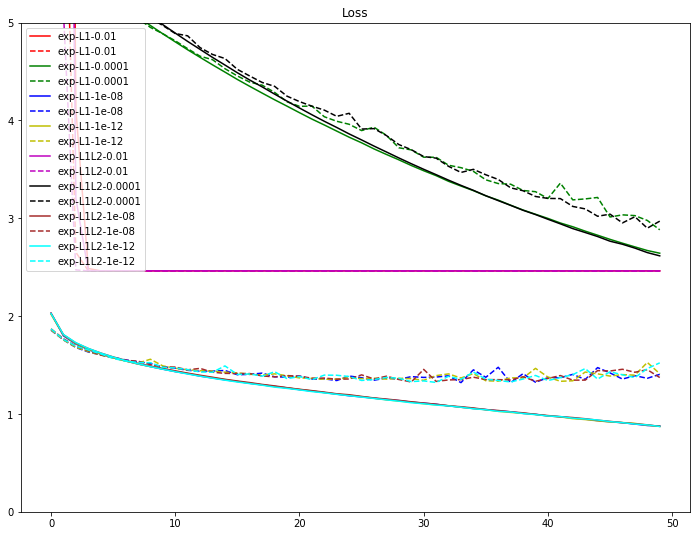

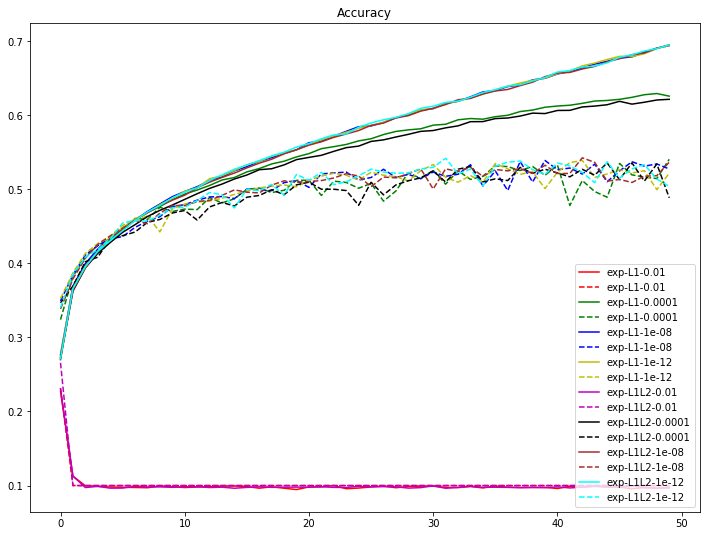

In [8]:
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "brown", "cyan"]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()